In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import losses
from keras.callbacks import EarlyStopping
from tensorflow.examples.tutorials.mnist import input_data
from keras import backend as K
import tensorflow as tf
from ipywidgets import interact_manual,interact
import pandas as pd
from keras.models import load_model

C:\Users\Andre\Anaconda3\envs\GreatEnv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True,log_device_placement=True,device_count = {'CPU' : 1, 'GPU' : 0}))
K.set_session(sess)

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

# First we will zip the training labels with the training images
dataWithLabels = zip(mnist.train.labels, mnist.train.images)

# Now let's turn this into a dictionary where subsets of the images in respect 
# to digit class are stored via the corresponding key.

# Init dataDict with keys [0,9] and empty lists.
digitDict = {}
for i in range(0,10):
    digitDict[i] = []

# Assign a list of image vectors to each corresponding digit class index. 
for i in dataWithLabels:
    digitDict[i[0]].append(i[1])

# Convert the lists into numpy matricies. (could be done above, but I claim ignorace)
for i in range(0,10):
    digitDict[i] = np.matrix(digitDict[i])
    print("Digit {0} matrix shape: {1}".format(i,digitDict[i].shape))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Digit 0 matrix shape: (5444, 784)
Digit 1 matrix shape: (6179, 784)
Digit 2 matrix shape: (5470, 784)
Digit 3 matrix shape: (5638, 784)
Digit 4 matrix shape: (5307, 784)
Digit 5 matrix shape: (4987, 784)
Digit 6 matrix shape: (5417, 784)
Digit 7 matrix shape: (5715, 784)
Digit 8 matrix shape: (5389, 784)
Digit 9 matrix shape: (5454, 784)


In [73]:
def simpleAE(encoding_dim = 32, input_dim = 784):

    # this is our input placeholder
    input_img = Input(shape=(input_dim,))
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='relu')(input_img)
    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(input_dim, activation='relu')(encoded)

    # this model maps an input to its reconstruction
    return Model(input_img, decoded)

In [74]:
ae1 = simpleAE(64,784)
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

In [75]:
history = ae1.fit(digitDict[0], digitDict[0],
                    epochs=100,
                    batch_size=20,
                    shuffle=True,verbose=1)

Epoch 1/100
5444/5444 [==============================] - 6s 1ms/step - loss: 0.4499
Epoch 2/100
5444/5444 [==============================] - 1s 105us/step - loss: 0.2698
Epoch 3/100
5444/5444 [==============================] - 1s 104us/step - loss: 0.2243
Epoch 4/100
5444/5444 [==============================] - 1s 104us/step - loss: 0.2095
Epoch 5/100
5444/5444 [==============================] - 1s 102us/step - loss: 0.1991
Epoch 6/100
5444/5444 [==============================] - 1s 104us/step - loss: 0.1929
Epoch 7/100
5444/5444 [==============================] - 1s 105us/step - loss: 0.1862
Epoch 8/100
5444/5444 [==============================] - 1s 105us/step - loss: 0.1822
Epoch 9/100
5444/5444 [==============================] - 1s 114us/step - loss: 0.1796
Epoch 10/100
5444/5444 [==============================] - 1s 106us/step - loss: 0.1738
Epoch 11/100
5444/5444 [==============================] - 1s 106us/step - loss: 0.1721
Epoch 12/100
5444/5444 [==============================

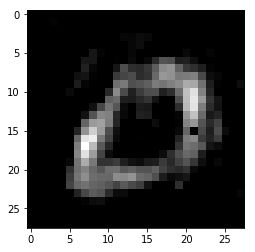

In [76]:
res = ae1.predict(np.random.binomial(1,.5,(1,28*28)))
plt.imshow(res.reshape(28,28),cmap="gray")
plt.show()

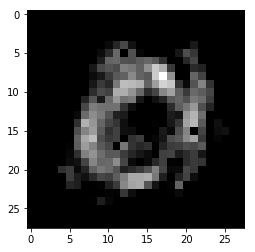

In [87]:
res = ae1.predict(np.matrix(np.random.rand(28*28)))
plt.imshow(res.reshape(28,28),cmap="gray")
plt.show()

array([0.32242363, 0.19963612, 0.54254191, 0.43867746, 0.71651567,
       0.33773406, 0.47752534, 0.43329593, 0.06364311, 0.82524161,
       0.52038662, 0.98977828, 0.53060926, 0.21143293, 0.49275051,
       0.53866116, 0.42051528, 0.1759146 , 0.50247806, 0.45541996,
       0.68653165, 0.0256201 , 0.57988471, 0.20726643, 0.83106091,
       0.95357234, 0.45989191, 0.2420963 , 0.67714173, 0.45555153,
       0.44873094, 0.33383602, 0.41240909, 0.04012667, 0.86354322,
       0.04995026, 0.00438403, 0.42040695, 0.51153211, 0.33221943,
       0.56424552, 0.66656972, 0.50968058, 0.91436344, 0.97798182,
       0.29969828, 0.83102076, 0.64887958, 0.78895286, 0.65388154,
       0.96926927, 0.85752832, 0.30384626, 0.39290817, 0.42118239,
       0.04088402, 0.71053508, 0.30357101, 0.32934495, 0.28975751,
       0.53153527, 0.91234923, 0.63452469, 0.57887721, 0.168213  ,
       0.27900882, 0.822865  , 0.32211655, 0.30853321, 0.31989248,
       0.1469781 , 0.5906918 , 0.56066591, 0.84234024, 0.47901

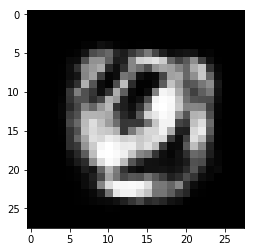

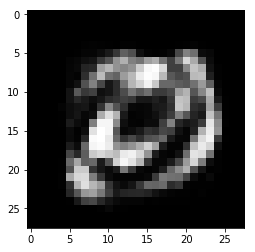

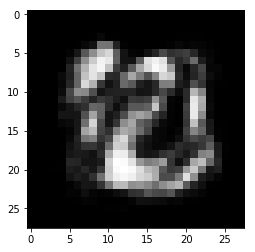

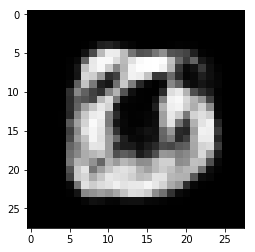

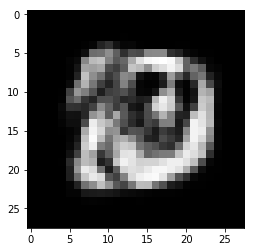

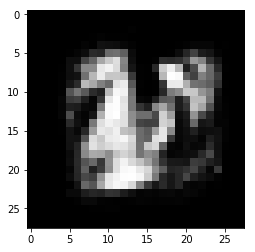

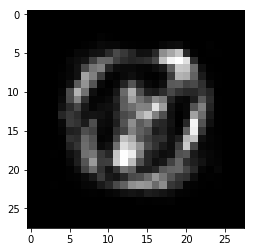

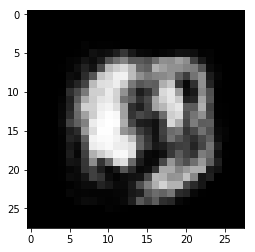

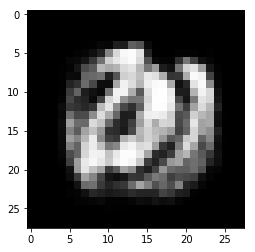

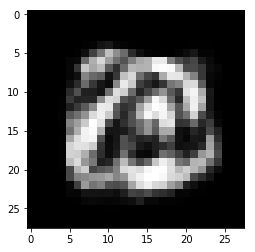

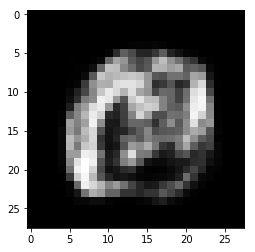

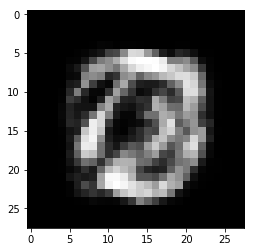

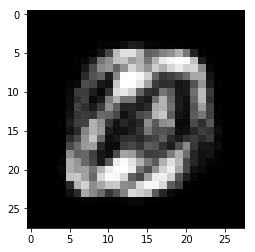

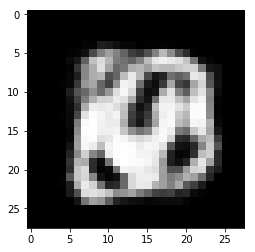

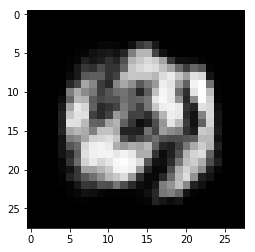

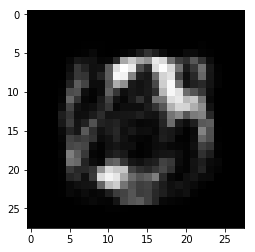

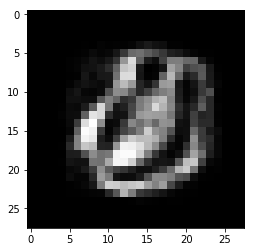

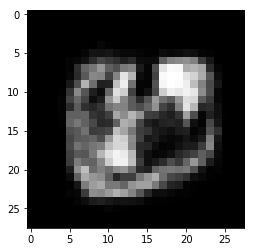

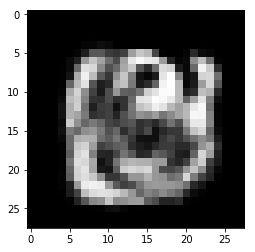

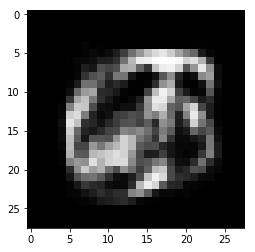

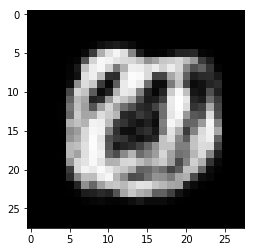

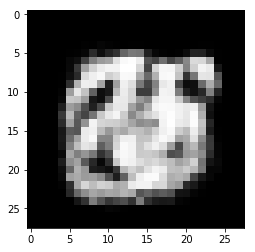

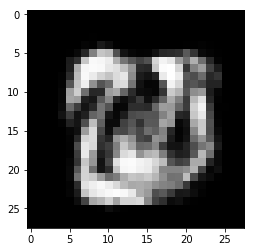

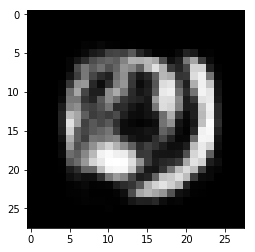

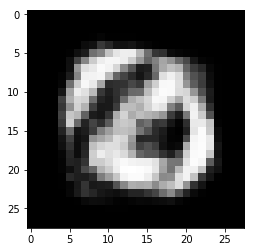

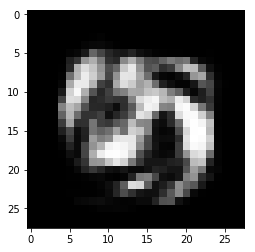

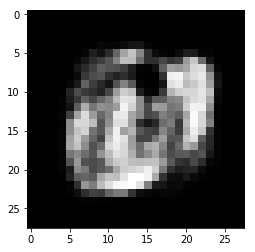

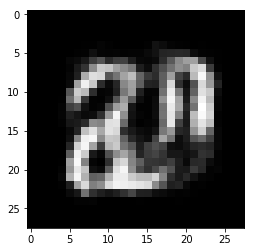

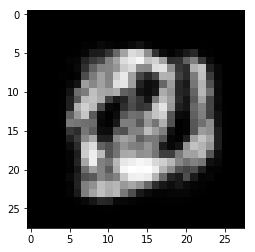

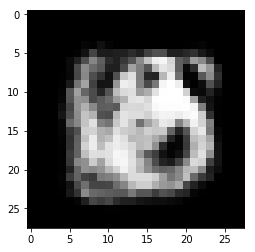

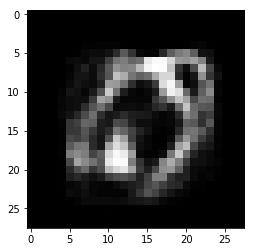

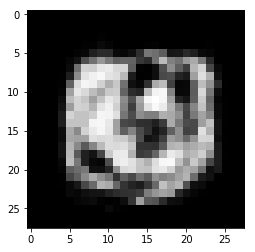

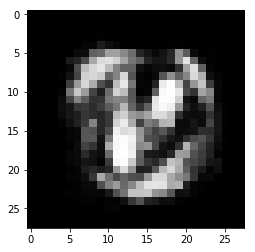

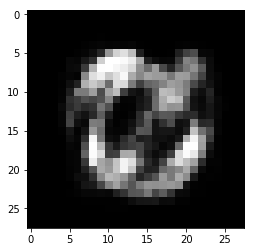

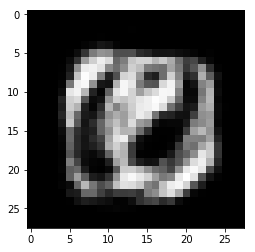

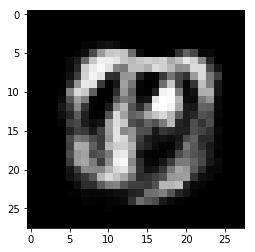

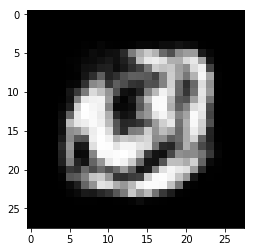

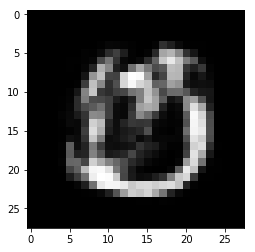

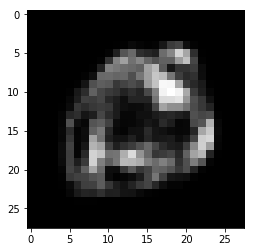

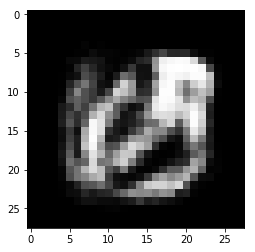

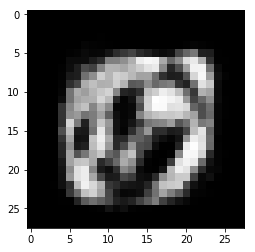

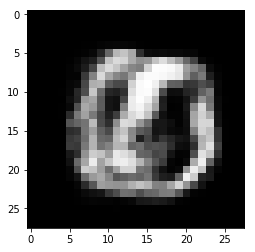

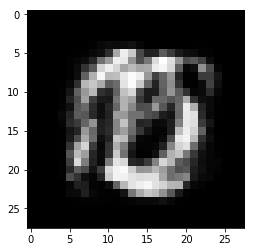

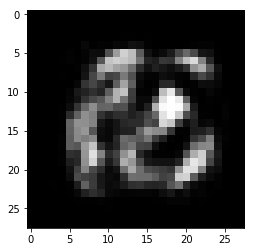

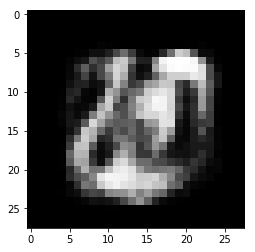

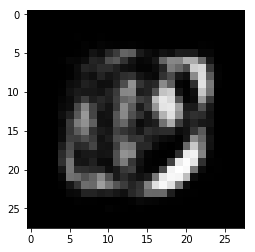

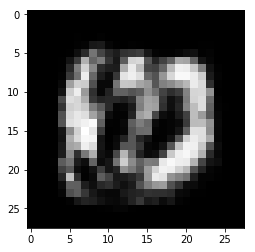

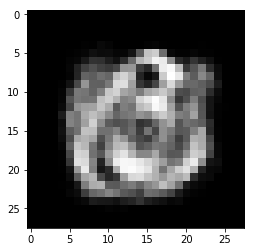

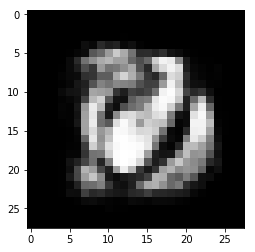

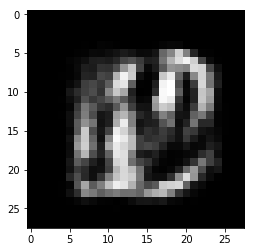

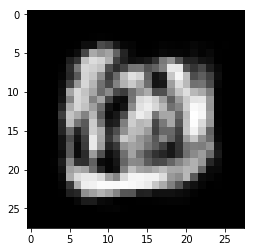

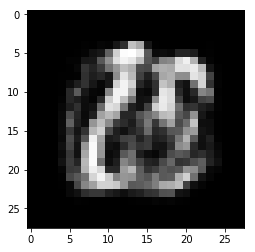

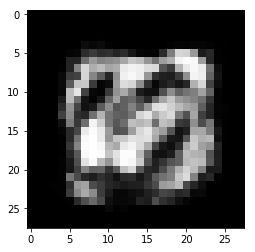

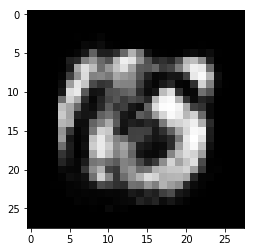

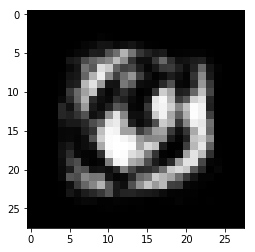

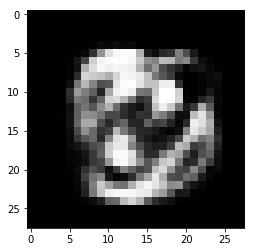

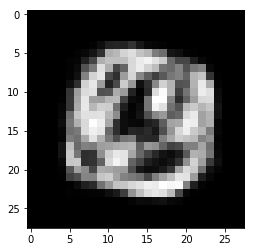

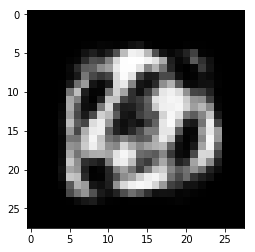

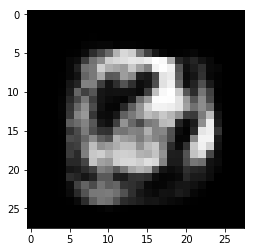

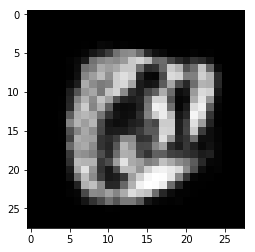

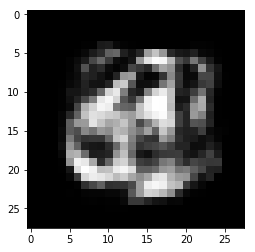

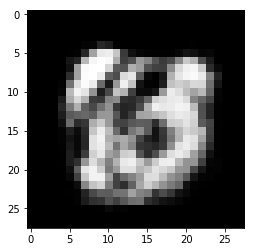

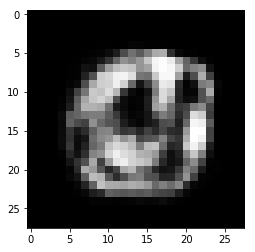

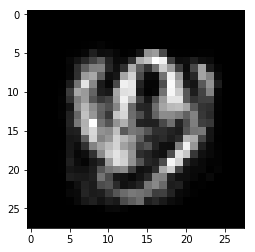

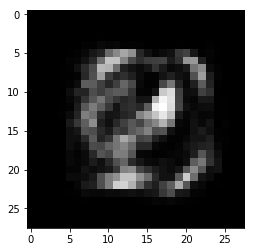

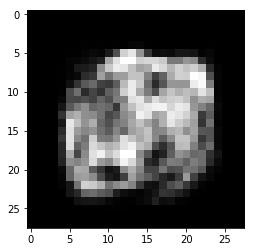

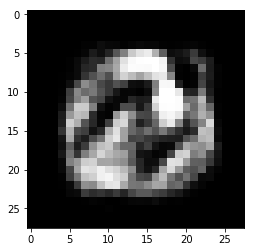

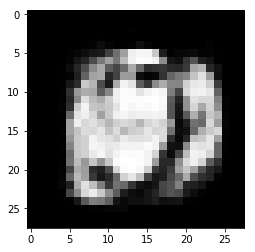

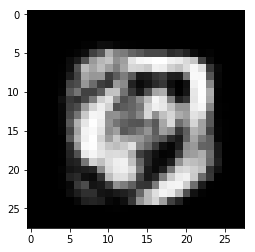

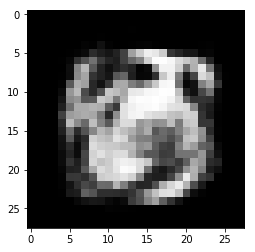

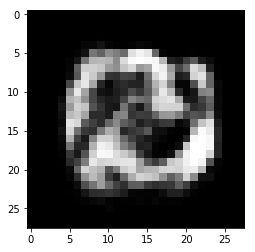

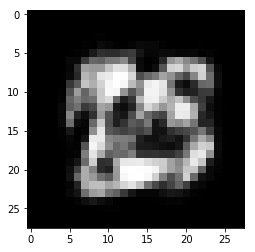

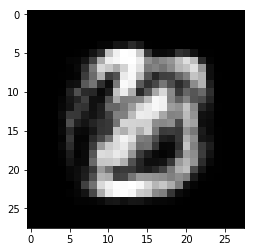

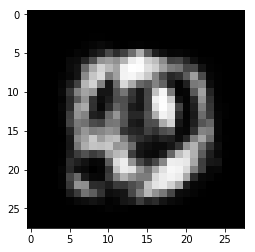

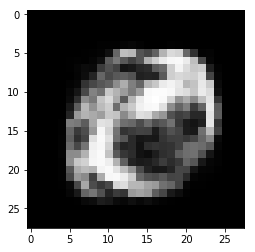

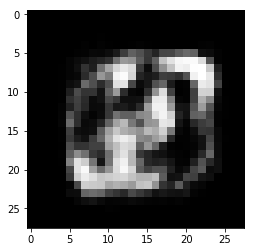

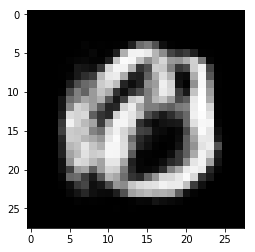

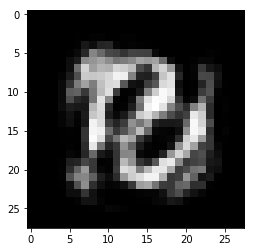

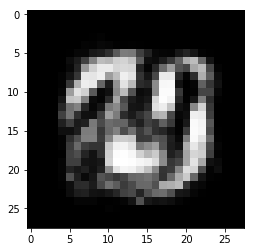

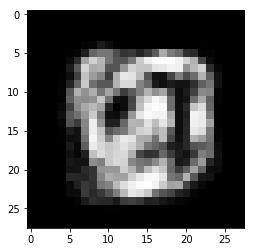

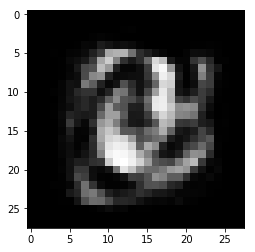

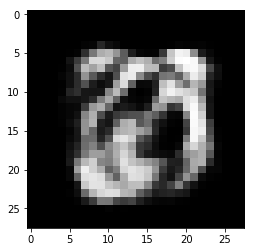

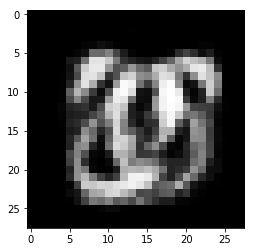

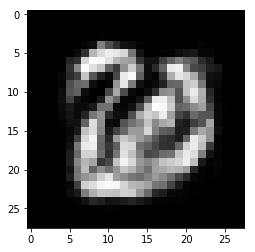

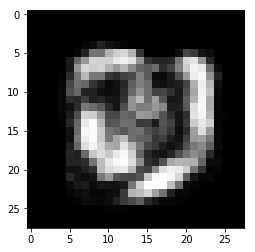

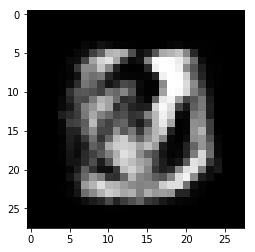

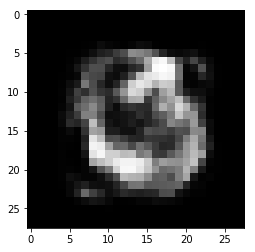

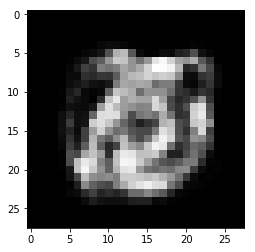

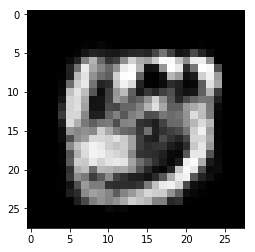

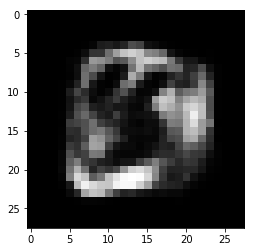

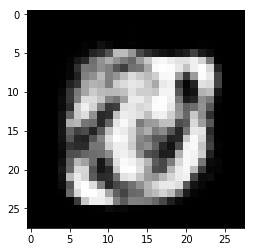

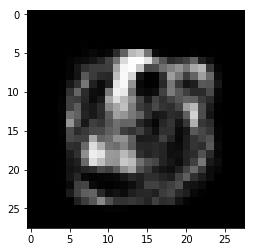

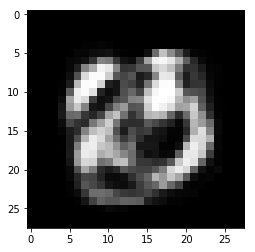

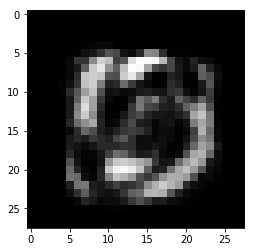

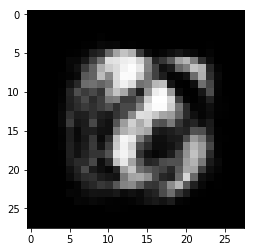

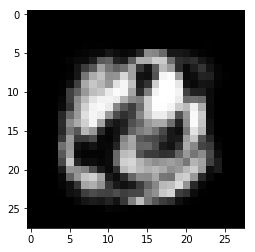

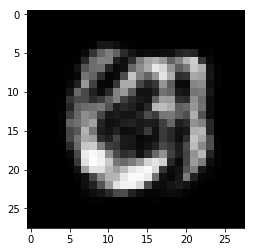

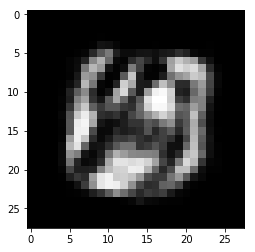

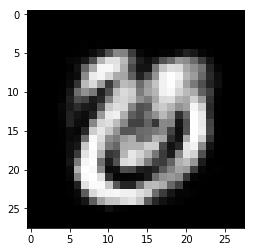

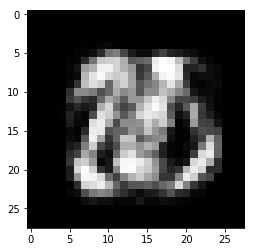

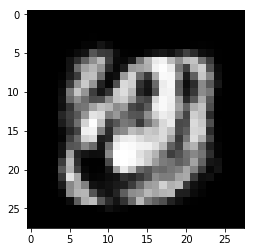

In [49]:
res = ae1.predict(np.random.binomial(1,.5,(1,28*28)))
plt.imshow(res.reshape(28,28),cmap="gray")
plt.show()

for i in range(100'
'):
    res = ae1.predict(np.random.binomial(1,.5,(1,28*28)))
    plt.imshow(res.reshape(28,28),cmap="gray")
    plt.show()
